In [172]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import os
import urllib.request

# MPL Dependencies
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

In [150]:
# Define the matchup parameters
year = 2021
week = '01'
away_team = 'NYJ'
home_team = 'CAR'

In [152]:
# <!--------------PUT THIS IN A FUNCTION AND IMPORT, SOLVE "no logo_df found" error-------------!>

# Pull the team description
logos = nfl.import_team_desc()

# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn', 'team_color']]

# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Initialize an empty list for the team colors
team_color = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists("logos"):
    os.makedirs("logos")

# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_color.append(logos['team_color'][team])


# Create a dictionary to put logo_paths and team_abbr in
data = {'team_abbr': team_abbr, 'logo_path': logo_paths, 'team_color': team_color}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

URLError: <urlopen error [Errno 54] Connection reset by peer>

In [153]:
# Load the NFL 2022 PBP data
pbp_df = nfl.import_pbp_data([year])

2021 done.
Downcasting floats.


In [154]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,n_offense,defense_players,n_defense
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,0.0,,0.0
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,None,None,NaN,None,NaN,43616;43680;52416;49410;53634;43556;53639;4625...,00-0032560;00-0036356;00-0035705;00-0036896;00...,11.0,00-0032496;00-0036652;00-0032355;00-0033455;00...,11.0
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,11.0,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,11.0,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",4.0,52416;42401;49410;43556;38629;40008;47816;4784...,00-0032355;00-0029413;00-0029701;00-0033455;00...,11.0,00-0036356;00-0032127;00-0035705;00-0030528;00...,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NaN,43298;47844;42500;43045;32230;52588;47917;4334...,,0.0,,0.0
50708,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,None,None,None,...,None,None,NaN,None,NaN,,,0.0,,0.0
50709,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",3.0,43298;42500;47844;43045;32230;52588;47917;4334...,,0.0,,0.0
50710,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,None,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,52544;42400;46146;43299;46180;44872;46633;4612...,,0.0,,0.0


In [155]:
# Filter down to a single game (Week 1: Rams vs. Bills)
pbp_df = pbp_df[pbp_df['game_id'] == f'{year}_{week}_{away_team}_{home_team}']

# Filter down to necessary columns
pbp_df = pbp_df[['posteam', 'game_seconds_remaining', 'away_wp', 'home_wp']]

# Rename posteam to team_abbr
pbp_df = pbp_df.rename(columns={'posteam':'team_abbr'})

In [156]:
# Join logo_df on pbp_df to get colors and logos
vis_df = pd.merge(pbp_df, logo_df)
vis_df

,team_abbr,game_seconds_remaining,away_wp,home_wp,logo_path,team_color
0,NYJ,3600.0,0.433208,0.566792,logos/NYJ.tif,#003F2D
1,NYJ,3600.0,0.433208,0.566792,logos/NYJ.tif,#003F2D
2,NYJ,3563.0,0.415296,0.584704,logos/NYJ.tif,#003F2D
3,NYJ,3543.0,0.430518,0.569481,logos/NYJ.tif,#003F2D
4,NYJ,3499.0,0.448653,0.551347,logos/NYJ.tif,#003F2D
...,...,...,...,...,...,...
158,CAR,115.0,0.042629,0.957371,logos/CAR.tif,#0085CA
159,CAR,111.0,0.045890,0.954110,logos/CAR.tif,#0085CA
160,CAR,97.0,0.021583,0.978417,logos/CAR.tif,#0085CA
161,CAR,54.0,0.014988,0.985012,logos/CAR.tif,#0085CA


In [169]:
# Define home and away color variables
away_color = vis_df[vis_df['team_abbr'] == away_team].iloc[0]['team_color']
home_color = vis_df[vis_df['team_abbr'] == home_team].iloc[0]['team_color']

# Define home and away logo paths
away_path = str(vis_df[vis_df['team_abbr'] == away_team].iloc[0]['logo_path'])
home_path = str(vis_df[vis_df['team_abbr'] == home_team].iloc[0]['logo_path'])

home_path

'logos/CAR.tif'

In [173]:
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=15, offset = 10 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                    [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]

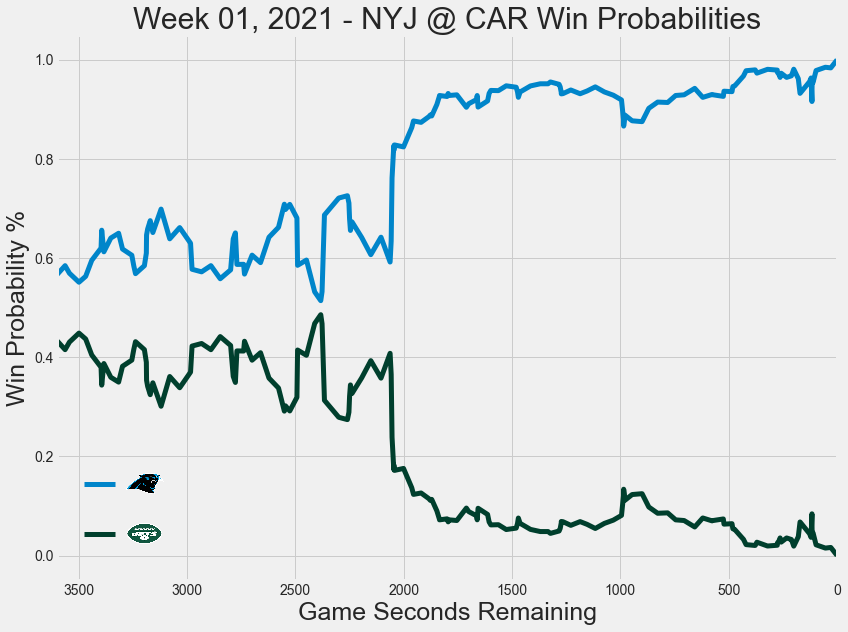

In [190]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Define the subplot
fig, ax = plt.subplots()

# Plot the data on the subplots
home_line, = ax.plot(pbp_df['game_seconds_remaining'], pbp_df['away_wp'], color=away_color, linewidth=5)
away_line, = ax.plot(pbp_df['game_seconds_remaining'], pbp_df['home_wp'], color=home_color, linewidth=5)

# Chart parameters
plt.title(f'Week {week}, {year} - {away_team} @ {home_team} Win Probabilities', fontdict={'fontsize':30});
plt.xlim((0,3600));
plt.xlabel("Game Seconds Remaining", {'fontsize':25});
plt.ylabel("Win Probability %", {'fontsize':25});

# Define the chart legend
plt.legend([away_line, home_line], ["", ""],
           handler_map= { home_line: HandlerLineImage(away_path), away_line: HandlerLineImage(home_path)},
           handlelength=2, labelspacing=0.0, fontsize=55, borderpad=0.15, loc=3,
           handletextpad=0.2, borderaxespad=0.15)

# Invert the x-axis so that it ends when there are 0 second remaining
ax.invert_xaxis()

# Style the chart
#plt.style.use('fivethirtyeight')